# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [10]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

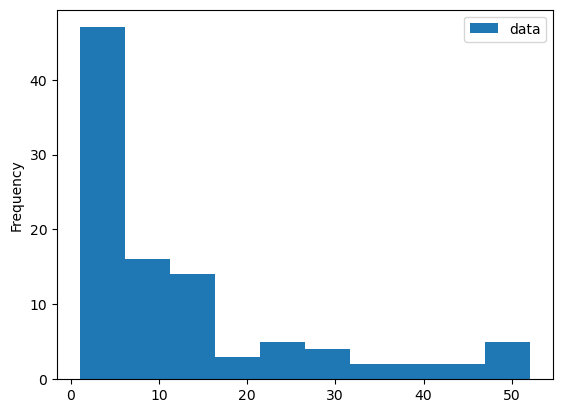

In [11]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

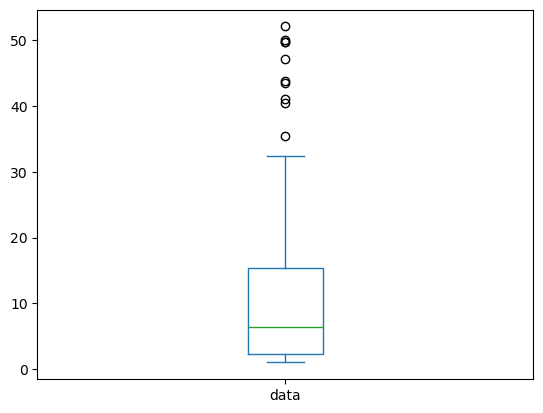

In [12]:
df.plot.box()

#### My Answer: 

Both of these graphs show a right skewed distribution in the data. However the Boxplot shows additional information such as the median, mean, and it shows a deeper outlook on the outliers of the data. 

With the boxplot you are able to see a bit more in terms of the size of the data points.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [13]:
df = pd.read_csv("Bank_Transaction_Fraud_Detection.csv")
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


We don't need some of the columns in the data such as "Custmer_ID", "Trasnaction_ID", "Customer_Conatact", and "Customer_Email" as it doesn't give us any real information for the analysis. So we will drop them in the cell below.

In [14]:
df = df.drop(columns=(["Customer_ID", "Transaction_ID", "Customer_Contact", "Customer_Email"]))
df.head()

,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Merchant_ID,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Transaction_Description
0,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,23-01-2025,16:04:07,32415.45,214e03c5-5c34-40d1-a66c-f440aa2bbd02,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,Bitcoin transaction
1,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,11-01-2025,17:14:53,43622.60,f9e3f11f-28d3-4199-b0ca-f225a155ede6,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,Grocery delivery
2,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,25-01-2025,03:09:52,63062.56,97977d83-5486-4510-af1c-8dada3e1cfa0,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,Mutual fund investment
3,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,19-01-2025,12:27:02,14000.72,f45cd6b3-5092-44d0-8afb-490894605184,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,Food delivery
4,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,30-01-2025,18:30:46,18335.16,70dd77dd-3b00-4b2c-8ebc-cfb8af5f6741,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,Debt repayment


The cell below will show how many times we see a customer's name. This may help us identify if the fraudulent transaction is from a specific person or if the way they make their business lables them a fraudster.

In [15]:
df["Customer_Name"].value_counts()

Customer_Name
Aahana Kala        8
Krishna Sani       7
Madhav Kala        7
Jonathan Dara      7
Mitali Lad         7
                  ..
Chaitaly Parekh    1
Omkaar Gandhi      1
Oviya Chokshi      1
Theodore Hari      1
Gopal Rout         1
Name: count, Length: 142699, dtype: int64

In [16]:
summary_stats = {}
num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    summary_stats[col] = {
        "Mean": df[col].mean(),
        "Median": df[col].median(),
        "Mode": df[col].mode().iloc[0],
        "Sd": df[col].std(),
    }

summary_df = pd.DataFrame(summary_stats).T
print(summary_df)

                            Mean     Median      Mode            Sd
Age                    44.015110     44.000     61.00     15.288774
Transaction_Amount  49538.015554  49502.440   3591.91  28551.874004
Account_Balance     52437.988784  52372.555  10338.39  27399.507128
Is_Fraud                0.050440      0.000      0.00      0.218852


In [17]:
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


The following line gives the average amount spent per age group from smallest to largest.

In [18]:
bins = range(10, 81, 10) # 0-9, 10-19, 20-29, ...
labels = [f"{i}s" for i in bins[:-1]] # "0s, 10s,...,90s"

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

avg_spent_by_group = df.groupby("AgeGroup")["Transaction_Amount"].mean()

avg_spend_sorted = avg_spent_by_group.sort_values()

for age_group, amount in avg_spend_sorted.items():
    print(f"{age_group}: ${amount:,.2f}")

70s: $48,968.25
30s: $49,375.97
50s: $49,408.26
60s: $49,487.86
10s: $49,534.63
20s: $49,708.34
40s: $49,770.22


C:\Users\marti\AppData\Local\Temp\ipykernel_31072\1774246807.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spent_by_group = df.groupby("AgeGroup")["Transaction_Amount"].mean()


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

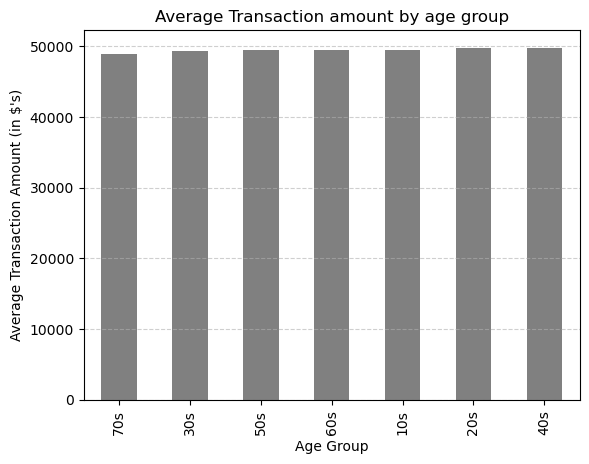

In [21]:
import matplotlib.pyplot as plt

avg_spend_sorted.plot(kind="bar", color="grey")
plt.title("Average Transaction amount by age group")
plt.xlabel("Age Group")
plt.ylabel("Average Transaction Amount (in $'s)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

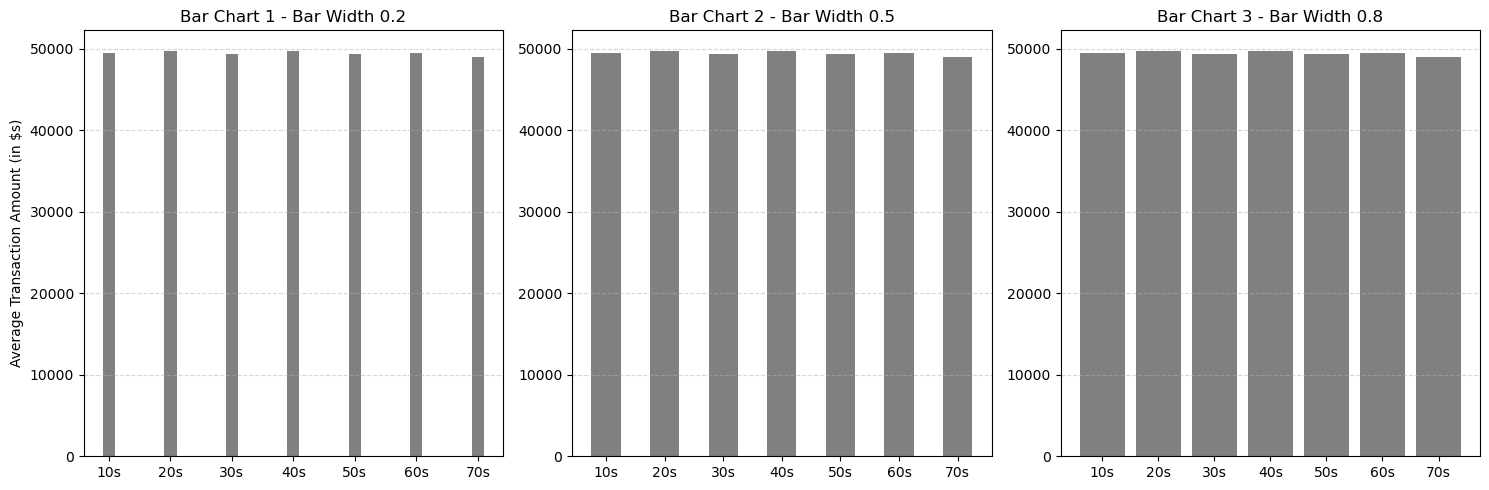

In [31]:
labels = avg_spent_by_group.index.tolist()
values = avg_spent_by_group.values
x = np.arange(len(labels))

width_sets = [
    [0.2]*len(labels),
    [0.5]*len(labels),
    [0.8]*len(labels),
]

fig, axes = plt.subplots(1, 3, figsize=(15,5))

for i, (ax, widths) in enumerate(zip(axes, width_sets)):
    for xi, yi, wi in zip(x, values, widths):
        ax.bar(xi, yi, width=wi, color="grey")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_title(f"Bar Chart {i+1} - Bar Width {widths[0]}")
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    if i == 0:
        ax.set_ylabel("Average Transaction Amount (in $s)")

plt.tight_layout()
plt.show()

Tried to copy figure 2.14 on page 53